## Importamos de Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

## Importamos Archivo CSV

In [ ]:
# Cargamos nuestros archivos en Google Colab
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records.csv to heart_failure_clinical_records (1).csv


In [ ]:
# Cargamos el archivo CSV y verificamos las primeras filas
df = pd.read_csv('heart_failure_clinical_records.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


Renombramos columnas

In [ ]:
# Creamos un diccionario para renombrar las columnas y luego aplicamos los cambios al DataFrame
dict_renombre = {'age': 'edad',
                 'anaemia': 'anemia',
                 'creatinine_phosphokinase': 'creatinina_fosfoquinasa',
                 'diabetes': 'diabetes',
                 'ejection_fraction': 'fraccion_de_eyeccion',
                 'high_blood_pressure': 'hipertension',
                 'platelets': 'plaquetas',
                 'serum_creatinine': 'creatinina_serica',
                 'serum_sodium': 'sodio_serico',
                 'sex': 'sexo',
                 'smoking': 'fumador',
                 'time': 'dias_segui',
                 'DEATH_EVENT': 'fallecio'}
df.rename(columns=dict_renombre, inplace=True)
df.head()

,edad,anemia,creatinina_fosfoquinasa,diabetes,fraccion_de_eyeccion,hipertension,plaquetas,creatinina_serica,sodio_serico,sexo,fumador,dias_segui,fallecio
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


# Análisis EDA

In [ ]:
# Obtenemos las dimensiones del DataFrame (número de filas y columnas)
df.shape

(5000, 13)

## Valores Nulos

In [ ]:
# Verificamos y contamos los valores nulos en cada columna del DataFrame
df.isnull().sum()

edad                       0
anemia                     0
creatinina_fosfoquinasa    0
diabetes                   0
fraccion_de_eyeccion       0
hipertension               0
plaquetas                  0
creatinina_serica          0
sodio_serico               0
sexo                       0
fumador                    0
dias_segui                 0
fallecio                   0
dtype: int64

Conclusión: No contamos con valores nulos en ninguna columna de nuestro DataFrame.

## Valores Duplicados

In [ ]:
# Verificamos y contamos las filas duplicadas en el DataFrame
df.duplicated().sum()

3680

Tenemos 3680 valores duplicados, los cuales mantendremos debido a que la descripción de la información indica que se trata de historias clínicas de 5000 pacientes.



##Validación de Tipos de datos a Analizar

In [ ]:
# Obtenemos los tipos de datos de cada columna en el DataFrame
df.dtypes

edad                       float64
anemia                       int64
creatinina_fosfoquinasa      int64
diabetes                     int64
fraccion_de_eyeccion         int64
hipertension                 int64
plaquetas                  float64
creatinina_serica          float64
sodio_serico                 int64
sexo                         int64
fumador                      int64
dias_segui                   int64
fallecio                     int64
dtype: object

La columna 'edad' contiene un dato numérico en años, por lo tanto, debería ser un integer. Verificaremos por qué se está considerando como un número float y realizaremos al conversiona integer.

In [ ]:
# Obtenemos los valores únicos de la columna 'edad' en el DataFrame
valores_unicos = df['edad'].unique()
valores_unicos

array([55.   , 65.   , 45.   , 60.   , 95.   , 70.   , 63.   , 50.   ,
       53.   , 60.667, 72.   , 64.   , 75.   , 66.   , 58.   , 42.   ,
       69.   , 68.   , 49.   , 51.   , 44.   , 59.   , 90.   , 61.   ,
       46.   , 80.   , 56.   , 41.   , 85.   , 82.   , 67.   , 52.   ,
       43.   , 81.   , 48.   , 57.   , 40.   , 86.   , 77.   , 73.   ,
       62.   , 87.   , 79.   , 47.   , 94.   , 71.   , 78.   , 54.   ])

In [ ]:
# Obtenemos el conteo de ocurrencias del valor decimal 60.667 en la columna 'edad' del DataFrame
conteo_decimal = df['edad'].value_counts().get(60.667, 0)
conteo_decimal

46

Verificamos que tenemos un valor decimal que se repite 46 veces; en este caso, consideraremos la parte entera de la edad y convertiremos la columna en tipo entero (integer).

In [ ]:
# convertimos la columna 'edad' al tipo de datos entero y luego obtiene los valores únicos
df['edad'] = df['edad'].astype(int)
valores_unicos = df['edad'].unique()
valores_unicos

array([55, 65, 45, 60, 95, 70, 63, 50, 53, 72, 64, 75, 66, 58, 42, 69, 68,
       49, 51, 44, 59, 90, 61, 46, 80, 56, 41, 85, 82, 67, 52, 43, 81, 48,
       57, 40, 86, 77, 73, 62, 87, 79, 47, 94, 71, 78, 54])

In [ ]:
# Obtenemos los tipos de datos de cada columna en el DataFrame después de la conversión
df.dtypes

edad                         int64
anemia                       int64
creatinina_fosfoquinasa      int64
diabetes                     int64
fraccion_de_eyeccion         int64
hipertension                 int64
plaquetas                  float64
creatinina_serica          float64
sodio_serico                 int64
sexo                         int64
fumador                      int64
dias_segui                   int64
fallecio                     int64
dtype: object

## Separación de variables Numéricas y Categóricas para un Mejor Análisis

In [ ]:
# Seleccionamos las columnas numéricas excluyendo aquellas de tipo 'object', luego removemos las columnas categóricas binarias
columnas_numericas = df.select_dtypes(exclude = 'object').columns.to_list()
columnas_numericas.remove('fallecio')
columnas_numericas.remove('anemia')
columnas_numericas.remove('diabetes')
columnas_numericas.remove('hipertension')
columnas_numericas.remove('fumador')
columnas_numericas.remove('sexo')
columnas_numericas


['edad',
 'creatinina_fosfoquinasa',
 'fraccion_de_eyeccion',
 'plaquetas',
 'creatinina_serica',
 'sodio_serico',
 'dias_segui']

In [ ]:
# Identificamos las columnas categóricas binarias, luego removemos la columna 'fallecio'
columnas_categoricas_binarias = [columna for columna in df.columns if df[columna].isin([0, 1]).all()]
columnas_categoricas_binarias.remove('fallecio')
columnas_categoricas_binarias

['anemia', 'diabetes', 'hipertension', 'sexo', 'fumador']

# **Análisis de Variables**

## **Análisis de Variable Objetivo (Categórica Binaria)**


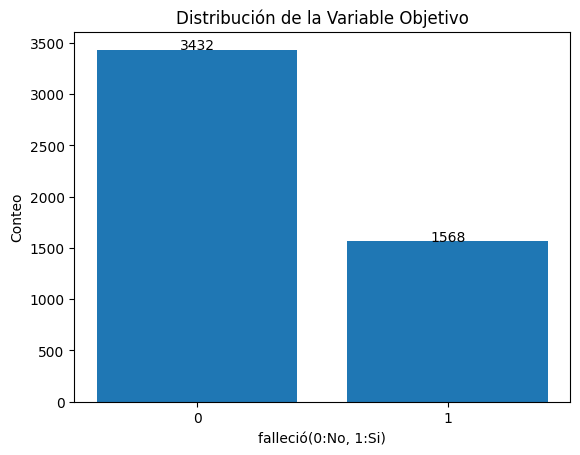

In [ ]:
# Calculamos el conteo de clases en la variable 'fallecio' y realizamos un gráfico de barras
conteo_clases = df['fallecio'].value_counts()

plt.bar(conteo_clases.index, conteo_clases.values)

# Agregamos etiquetas de conteo en las barras
for i, conteo in enumerate(conteo_clases.values):
    plt.text(i, conteo + 0.1, str(conteo), ha='center')
plt.xlabel('falleció(0:No, 1:Si)')
plt.ylabel('Conteo')
plt.title('Distribución de la Variable Objetivo')
plt.xticks(conteo_clases.index, ['0', '1'])
plt.show()

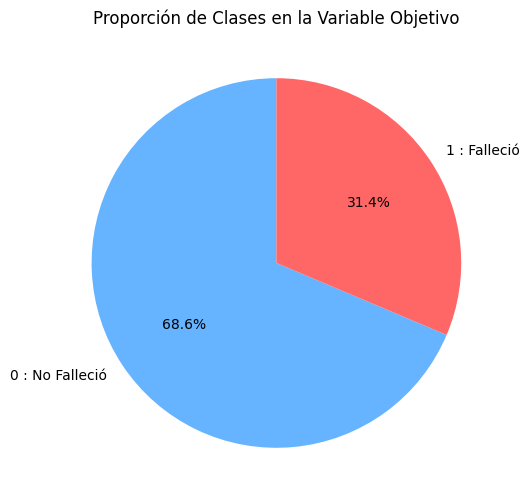

In [ ]:
# Calculamos la proporción de las clases en la variable 'fallecio' y realizamos un gráfico de tortas
proporcion_clases = df['fallecio'].value_counts(normalize=True)
porcentajes = proporcion_clases * 100

# Crearmos el gráfico de tortas
plt.figure(figsize=(6, 6))
plt.pie(proporcion_clases, labels=['0 : No Falleció', '1 : Falleció'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff6666'])
plt.title('Proporción de Clases en la Variable Objetivo')
plt.show()

##**Análisis de Variables Numéricas**

###**1. Edad**

####Análisis Univariable

Análisis univariable de la columna: edad
-----------------------------------------------------
Estadísticas descriptivas:
count    5000.00
mean       60.28
std        11.70
min        40.00
25%        50.00
50%        60.00
75%        68.00
max        95.00
Name: edad, dtype: float64





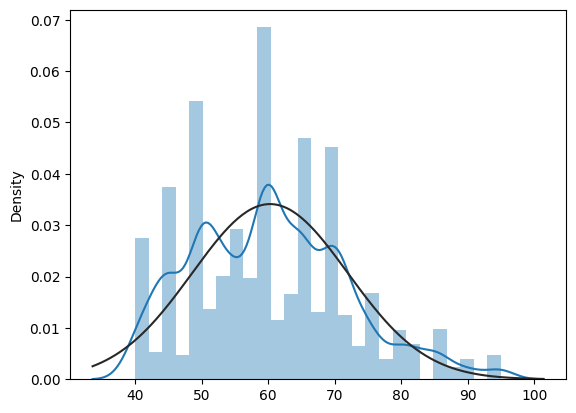

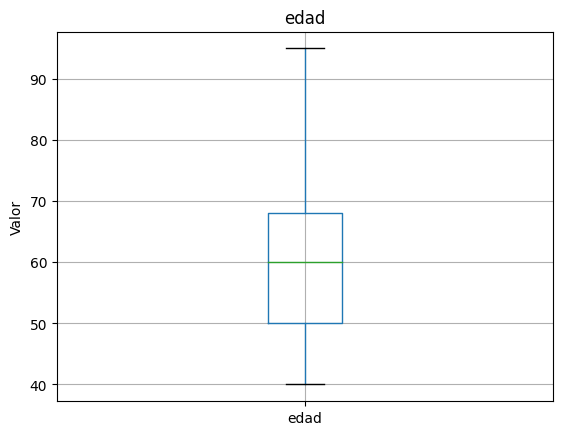

In [ ]:
columna = 'edad'

# Análisis estadístico
print("Análisis univariable de la columna:", columna)
print("-----------------------------------------------------")
print("Estadísticas descriptivas:")
print(df[columna].describe().round(2))
print("\n\n")

# Análisis con curva normalizada
sns.distplot(df[[columna]], fit = norm)
plt.plot()
plt.show()
print("\n\n")

# Creamos el boxplot
df[[columna]].boxplot()
plt.title(columna)
plt.ylabel("Valor")
plt.show()
print("\n\n")

####Análisis Bivariable con Respecto a la Variable Objetivo

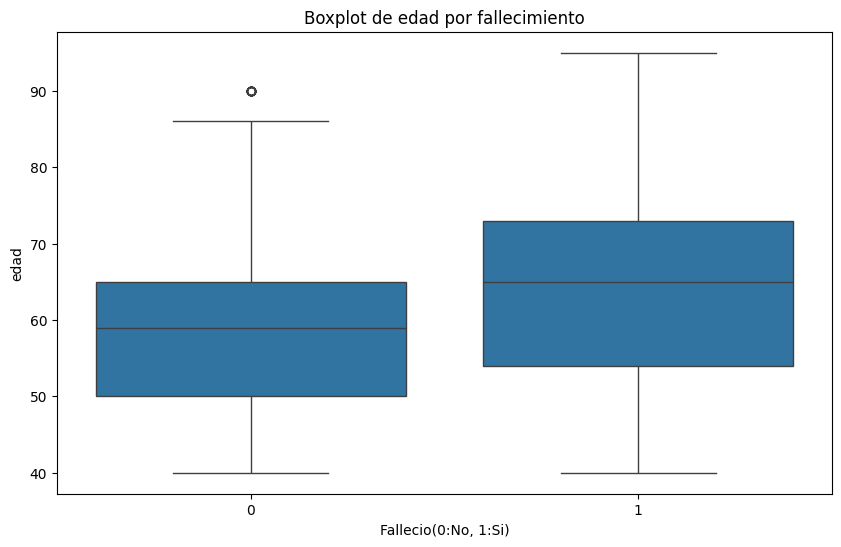

In [ ]:
# Crear el boxplot con variable fallecio
plt.figure(figsize=(10, 6))
sns.boxplot(x='fallecio', y=columna, data=df)
plt.title(f'Boxplot de {columna} por fallecimiento')
plt.xlabel('Fallecio(0:No, 1:Si)')
plt.ylabel(columna)
plt.show()
print("\n\n")

###**2. Creatinina Fosfoquinasa**

####Análisis Univariable

Análisis univariable de la columna: creatinina_fosfoquinasa
-----------------------------------------------------
Estadísticas descriptivas:
count    5000.00
mean      586.76
std       976.73
min        23.00
25%       121.00
50%       248.00
75%       582.00
max      7861.00
Name: creatinina_fosfoquinasa, dtype: float64





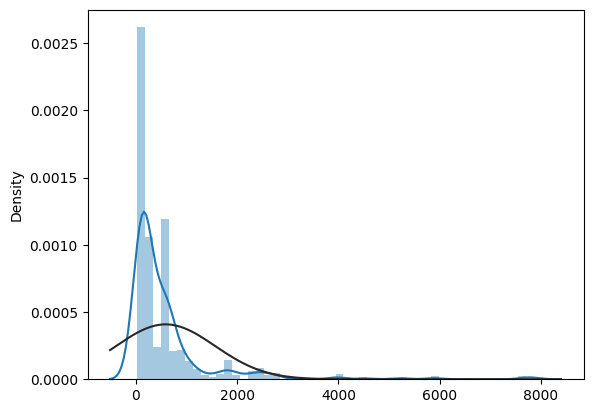

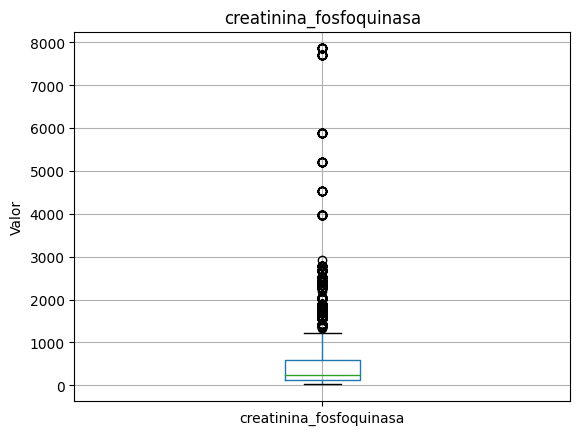

In [ ]:
columna = 'creatinina_fosfoquinasa'

# Análisis estadístico
print("Análisis univariable de la columna:", columna)
print("-----------------------------------------------------")
print("Estadísticas descriptivas:")
print(df[columna].describe().round(2))
print("\n\n")

# Análisis con curva normalizada
sns.distplot(df[[columna]], fit = norm)
plt.plot()
plt.show()
print("\n\n")

# Creamos el boxplot
df[[columna]].boxplot()
plt.title(columna)
plt.ylabel("Valor")
plt.show()
print("\n\n")




####Análisis Bivariable con Respecto a la Variable Objetivo

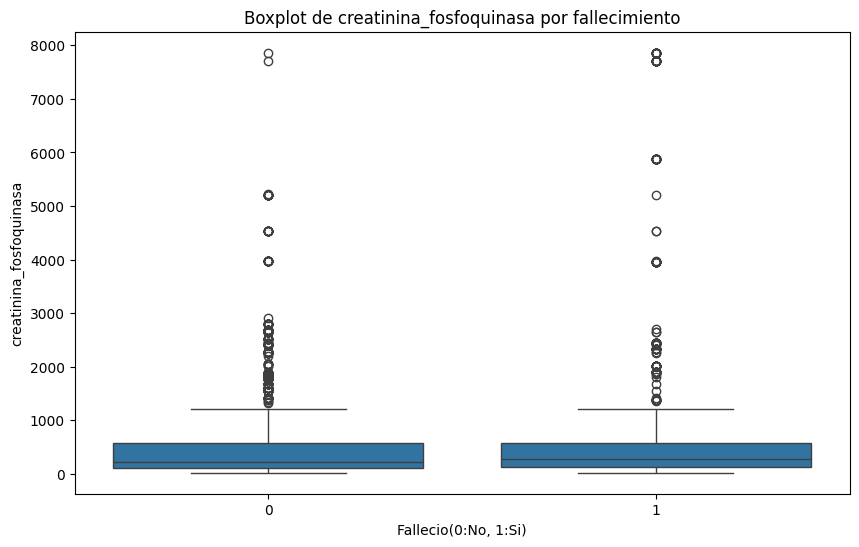

In [ ]:
# Crear el boxplot con variable fallecio
plt.figure(figsize=(10, 6))
sns.boxplot(x='fallecio', y=columna, data=df)
plt.title(f'Boxplot de {columna} por fallecimiento')
plt.xlabel('Fallecio(0:No, 1:Si)')
plt.ylabel(columna)
plt.show()
print("\n\n")

###**3. Creatinina Fracción de Eyección**

####Análisis Univariable

Análisis univariable de la columna: fraccion_de_eyeccion
-----------------------------------------------------
Estadísticas descriptivas:
count    5000.00
mean       37.73
std        11.51
min        14.00
25%        30.00
50%        38.00
75%        45.00
max        80.00
Name: fraccion_de_eyeccion, dtype: float64





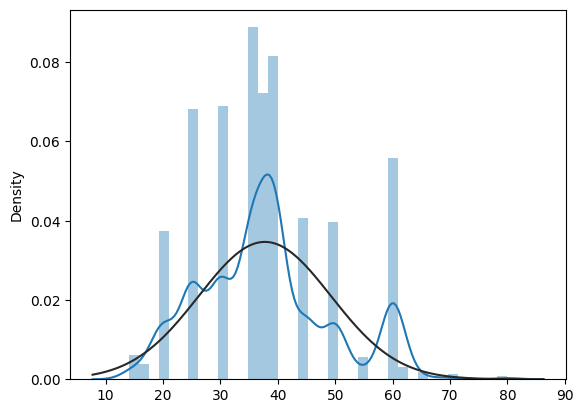

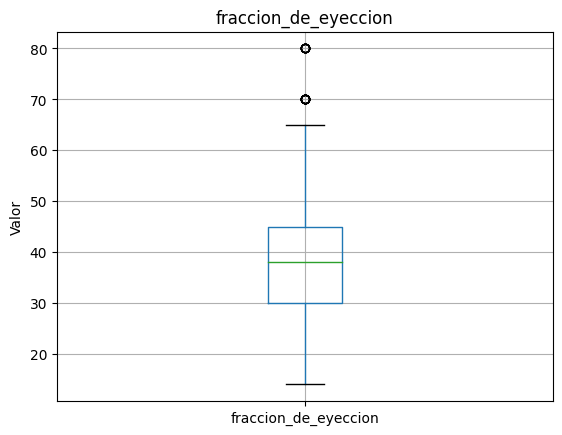

In [ ]:
columna = 'fraccion_de_eyeccion'

# Análisis estadístico
print("Análisis univariable de la columna:", columna)
print("-----------------------------------------------------")
print("Estadísticas descriptivas:")
print(df[columna].describe().round(2))
print("\n\n")

# Análisis con curva normalizada
sns.distplot(df[[columna]], fit = norm)
plt.plot()
plt.show()
print("\n\n")

# Creamos el boxplot
df[[columna]].boxplot()
plt.title(columna)
plt.ylabel("Valor")
plt.show()
print("\n\n")




####Análisis Bivariable con Respecto a la Variable Objetivo

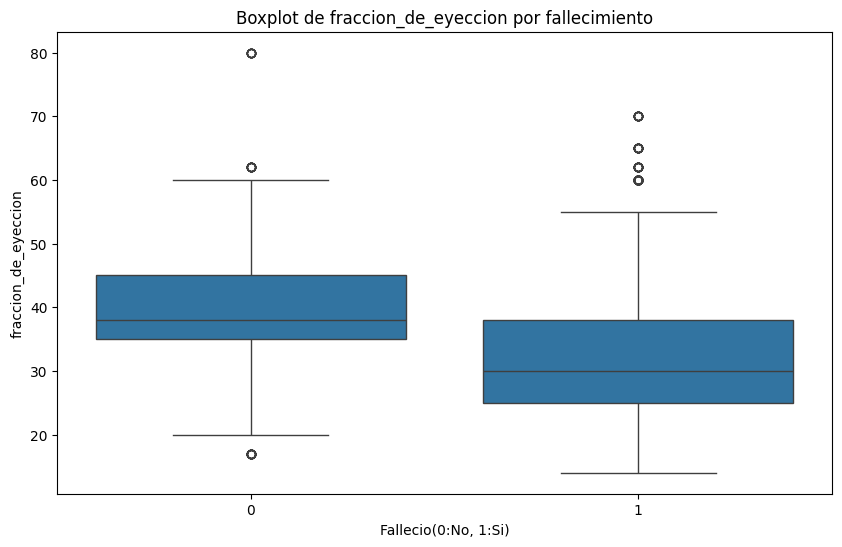

In [ ]:
# Crear el boxplot con variable fallecio
plt.figure(figsize=(10, 6))
sns.boxplot(x='fallecio', y=columna, data=df)
plt.title(f'Boxplot de {columna} por fallecimiento')
plt.xlabel('Fallecio(0:No, 1:Si)')
plt.ylabel(columna)
plt.show()
print("\n\n")

###**4. Plaquetas**

####Análisis Univariable

Análisis univariable de la columna: plaquetas
-----------------------------------------------------
Estadísticas descriptivas:
count      5000.00
mean     265075.40
std       97999.76
min       25100.00
25%      215000.00
50%      263358.03
75%      310000.00
max      850000.00
Name: plaquetas, dtype: float64





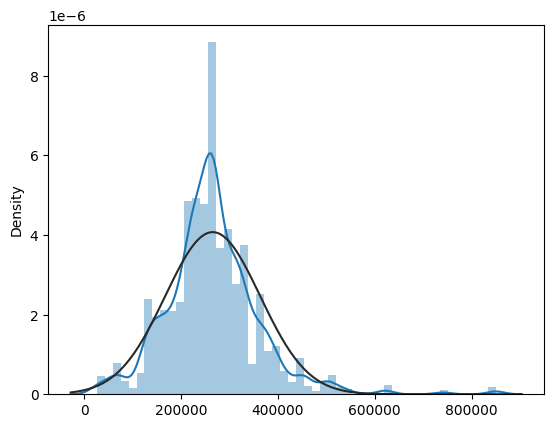

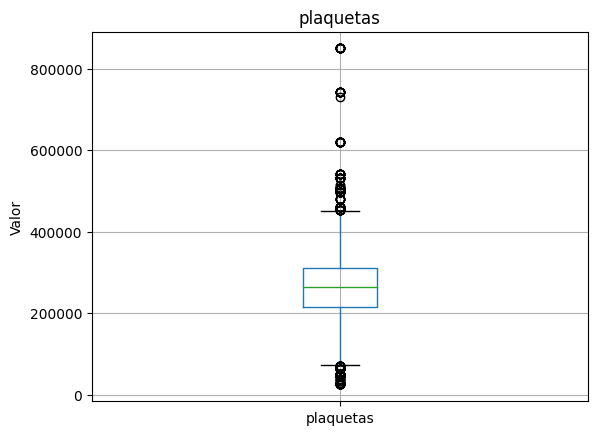

In [ ]:
columna = 'plaquetas'

# Análisis estadístico
print("Análisis univariable de la columna:", columna)
print("-----------------------------------------------------")
print("Estadísticas descriptivas:")
print(df[columna].describe().round(2))
print("\n\n")

# Análisis con curva normalizada
sns.distplot(df[[columna]], fit = norm)
plt.plot()
plt.show()
print("\n\n")

# Creamos el boxplot
df[[columna]].boxplot()
plt.title(columna)
plt.ylabel("Valor")
plt.show()
print("\n\n")



####Análisis Bivariable con Respecto a la Variable Objetivo

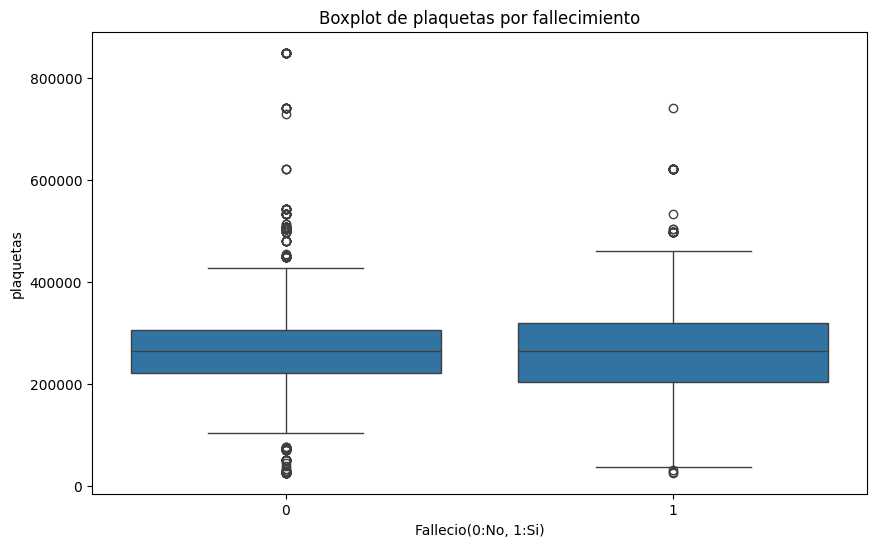

In [ ]:
# Crear el boxplot con variable fallecio
plt.figure(figsize=(10, 6))
sns.boxplot(x='fallecio', y=columna, data=df)
plt.title(f'Boxplot de {columna} por fallecimiento')
plt.xlabel('Fallecio(0:No, 1:Si)')
plt.ylabel(columna)
plt.show()
print("\n\n")

###**5. Creatinina Sérica**

####Análisis Univariable

Análisis univariable de la columna: creatinina_serica
-----------------------------------------------------
Estadísticas descriptivas:
count    5000.00
mean        1.37
std         1.01
min         0.50
25%         0.90
50%         1.10
75%         1.40
max         9.40
Name: creatinina_serica, dtype: float64





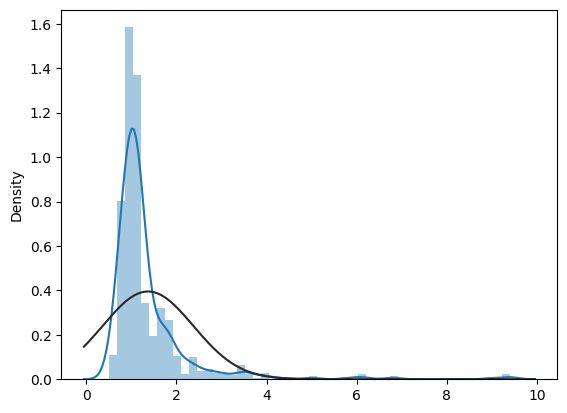

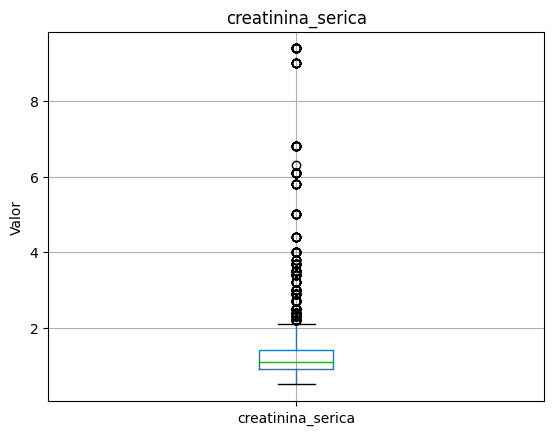

In [ ]:
columna = 'creatinina_serica'

# Análisis estadístico
print("Análisis univariable de la columna:", columna)
print("-----------------------------------------------------")
print("Estadísticas descriptivas:")
print(df[columna].describe().round(2))
print("\n\n")

# Análisis con curva normalizada
sns.distplot(df[[columna]], fit = norm)
plt.plot()
plt.show()
print("\n\n")

# Creamos el boxplot
df[[columna]].boxplot()
plt.title(columna)
plt.ylabel("Valor")
plt.show()
print("\n\n")



####Análisis Bivariable con Respecto a la Variable Objetivo

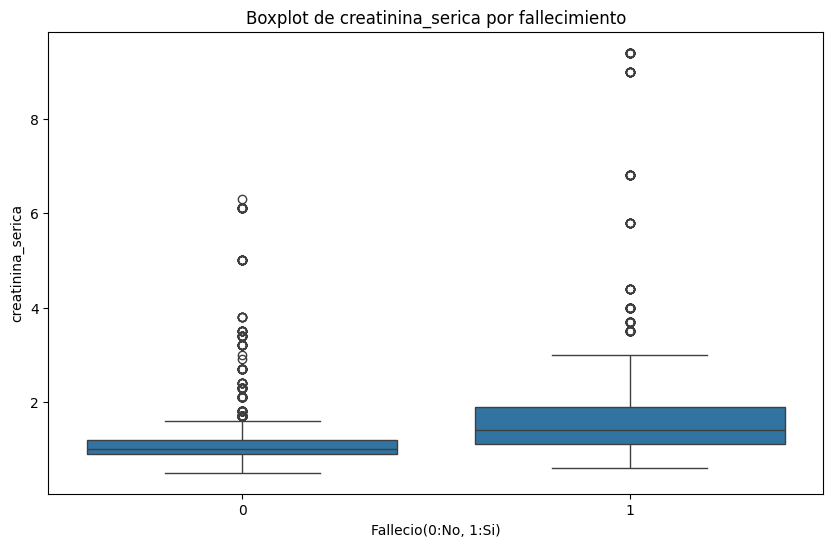

In [ ]:
# Crear el boxplot con variable fallecio
plt.figure(figsize=(10, 6))
sns.boxplot(x='fallecio', y=columna, data=df)
plt.title(f'Boxplot de {columna} por fallecimiento')
plt.xlabel('Fallecio(0:No, 1:Si)')
plt.ylabel(columna)
plt.show()
print("\n\n")

###**6. Sodio Sérico**

####Análisis Univariable

Análisis univariable de la columna: sodio_serico
-----------------------------------------------------
Estadísticas descriptivas:
count    5000.00
mean      136.81
std         4.46
min       113.00
25%       134.00
50%       137.00
75%       140.00
max       148.00
Name: sodio_serico, dtype: float64





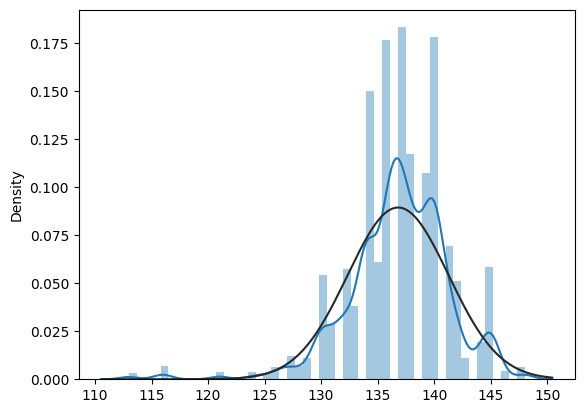

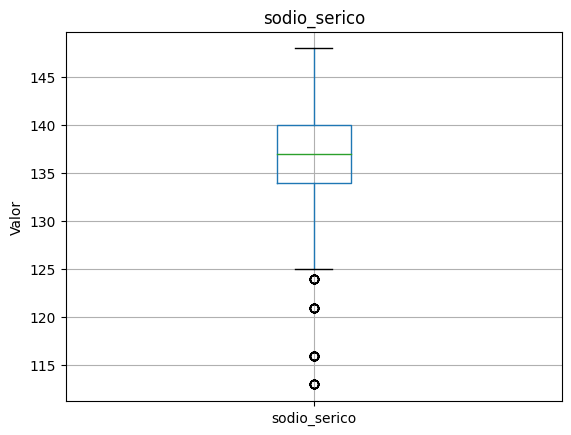

In [ ]:
columna = 'sodio_serico'

# Análisis estadístico
print("Análisis univariable de la columna:", columna)
print("-----------------------------------------------------")
print("Estadísticas descriptivas:")
print(df[columna].describe().round(2))
print("\n\n")

# Análisis con curva normalizada
sns.distplot(df[[columna]], fit = norm)
plt.plot()
plt.show()
print("\n\n")

# Creamos el boxplot
df[[columna]].boxplot()
plt.title(columna)
plt.ylabel("Valor")
plt.show()
print("\n\n")



####Análisis Bivariable con Respecto a la Variable Objetivo

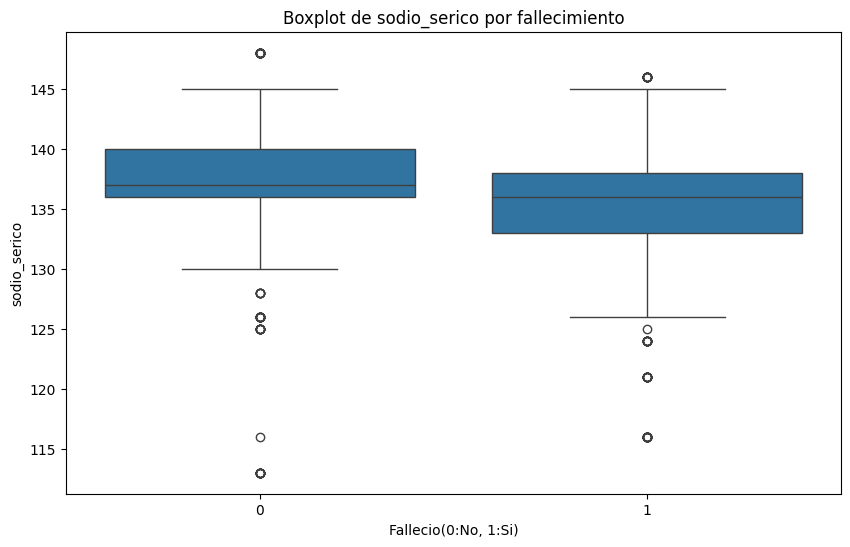

In [ ]:
# Crear el boxplot con variable fallecio
plt.figure(figsize=(10, 6))
sns.boxplot(x='fallecio', y=columna, data=df)
plt.title(f'Boxplot de {columna} por fallecimiento')
plt.xlabel('Fallecio(0:No, 1:Si)')
plt.ylabel(columna)
plt.show()
print("\n\n")

###**7. Días de Seguimiento**

####Análisis Univariable

Análisis univariable de la columna: dias_segui
-----------------------------------------------------
Estadísticas descriptivas:
count    5000.00
mean      130.68
std        77.33
min         4.00
25%        74.00
50%       113.00
75%       201.00
max       285.00
Name: dias_segui, dtype: float64





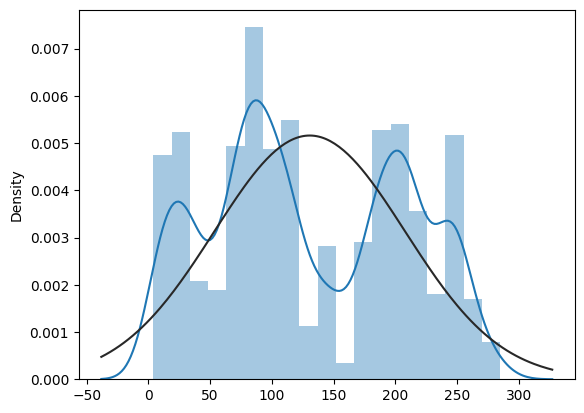

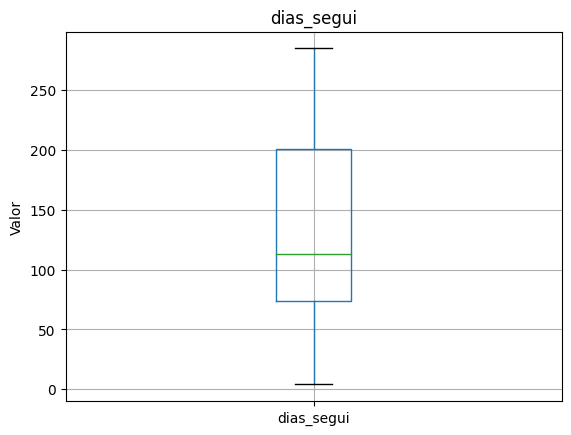

In [ ]:
columna = 'dias_segui'

# Análisis estadístico
print("Análisis univariable de la columna:", columna)
print("-----------------------------------------------------")
print("Estadísticas descriptivas:")
print(df[columna].describe().round(2))
print("\n\n")

# Análisis con curva normalizada
sns.distplot(df[[columna]], fit = norm)
plt.plot()
plt.show()
print("\n\n")

# creamos el boxplot
df[[columna]].boxplot()
plt.title(columna)
plt.ylabel("Valor")
plt.show()
print("\n\n")



####Análisis Bivariable con Respecto a la Variable Objetivo

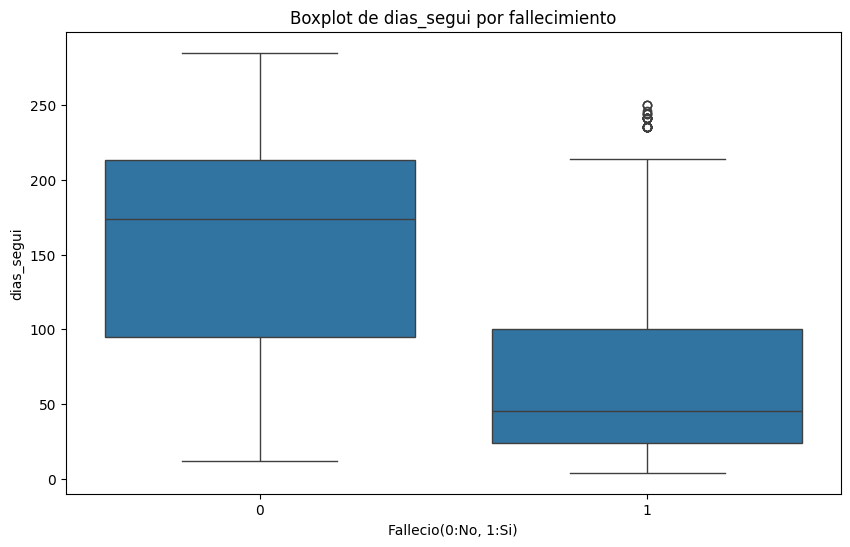

In [ ]:
# Crear el boxplot con variable fallecio
plt.figure(figsize=(10, 6))
sns.boxplot(x='fallecio', y=columna, data=df)
plt.title(f'Boxplot de {columna} por fallecimiento')
plt.xlabel('Fallecio(0:No, 1:Si)')
plt.ylabel(columna)
plt.show()
print("\n\n")

##**Análisis de Variables Categóricas Binarias**

###**1. Anemia**

####Análisis Univariable

LEYENDA:
0 = No Tiene Anemia
1 = Tiene Anemia





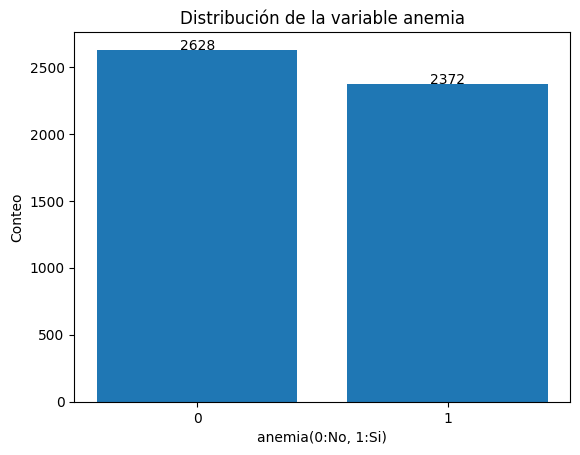

In [ ]:
categoria = 'anemia'
print("""LEYENDA:
0 = No Tiene Anemia
1 = Tiene Anemia""")
print("\n\n")

# Calculamos el conteo de clases de la categoría y realizamos un gráfico de barras
conteo_clases = df[categoria].value_counts()
plt.bar(conteo_clases.index, conteo_clases.values)

# Agregamos etiquetas de conteo en las barras
for i, conteo in enumerate(conteo_clases.values):
    plt.text(i, conteo + 0.1, str(conteo), ha='center')
plt.xlabel(f'{categoria}(0:No, 1:Si)')
plt.ylabel('Conteo')
plt.title(f'Distribución de la variable {categoria}')
plt.xticks(conteo_clases.index, ['0', '1'])
plt.show()
print("\n\n")




####Análisis Bivariable con Respecto a la Variable Objetivo

In [ ]:
# Generamos una tabla cruzada para ver la relación entre variables categóricas
pd.crosstab(df[categoria], df['fallecio'],normalize = 'columns')*100

fallecio,0,1
anemia,,
0,54.399767,48.533163
1,45.600233,51.466837


###**2. Diabetes**

####Análisis Univariable

LEYENDA:
0 = No Tiene Diabetes
1 = Tiene Diabetes





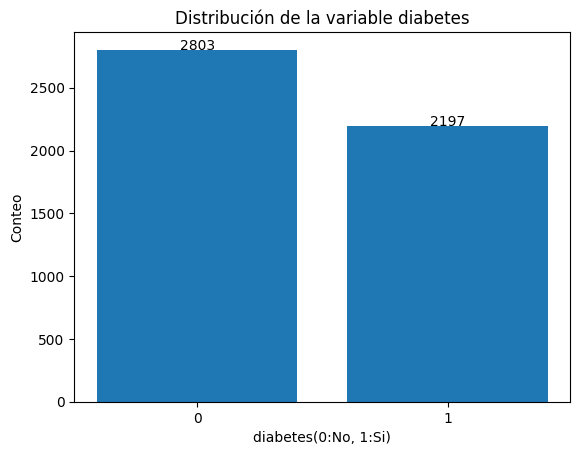

In [ ]:
categoria = 'diabetes'
print("""LEYENDA:
0 = No Tiene Diabetes
1 = Tiene Diabetes""")
print("\n\n")

# Calculamos el conteo de clases de la categoría y realizamos un gráfico de barras
conteo_clases = df[categoria].value_counts()
plt.bar(conteo_clases.index, conteo_clases.values)

# Agregamos etiquetas de conteo en las barras
for i, conteo in enumerate(conteo_clases.values):
    plt.text(i, conteo + 0.1, str(conteo), ha='center')
plt.xlabel(f'{categoria}(0:No, 1:Si)')
plt.ylabel('Conteo')
plt.title(f'Distribución de la variable {categoria}')
plt.xticks(conteo_clases.index, ['0', '1'])
plt.show()
print("\n\n")



####Análisis Bivariable con Respecto a la Variable Objetivo

In [ ]:
# Generamos una tabla cruzada para ver la relación entre variables categóricas
pd.crosstab(df[categoria], df['fallecio'],normalize = 'columns')*100

fallecio,0,1
diabetes,,
0,55.681818,56.887755
1,44.318182,43.112245


###**3. Hipertensión**

####Análisis Univariable

LEYENDA:
0 = No Tiene Hipertensión
1 = Tiene Hipertensión





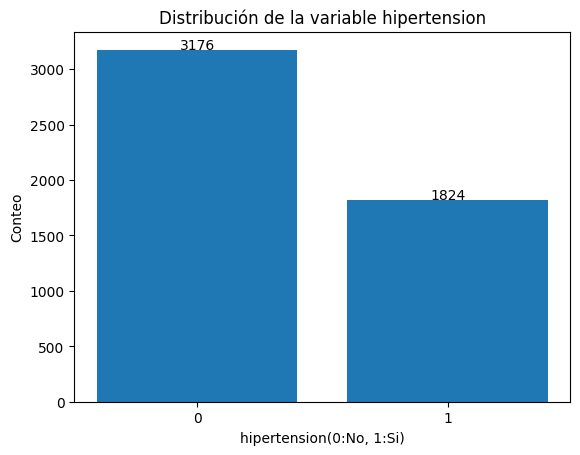

In [ ]:
categoria = 'hipertension'
print("""LEYENDA:
0 = No Tiene Hipertensión
1 = Tiene Hipertensión""")
print("\n\n")

# Calculamos el conteo de clases de la categoría y realizamos un gráfico de barras
conteo_clases = df[categoria].value_counts()
plt.bar(conteo_clases.index, conteo_clases.values)

# Agregamos etiquetas de conteo en las barras
for i, conteo in enumerate(conteo_clases.values):
    plt.text(i, conteo + 0.1, str(conteo), ha='center')
plt.xlabel(f'{categoria}(0:No, 1:Si)')
plt.ylabel('Conteo')
plt.title(f'Distribución de la variable {categoria}')
plt.xticks(conteo_clases.index, ['0', '1'])
plt.show()
print("\n\n")



####Análisis Bivariable con Respecto a la Variable Objetivo

In [ ]:
# Generamos una tabla cruzada para ver la relación entre variables categóricas
pd.crosstab(df[categoria], df['fallecio'],normalize = 'columns')*100

fallecio,0,1
hipertension,,
0,66.579254,56.82398
1,33.420746,43.17602


###**4. Sexo**

####Análisis Univariable

LEYENDA:
0 = Mujer
1 = Varón





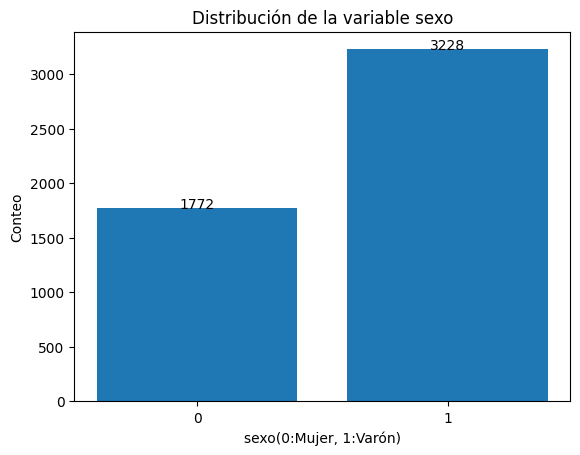

In [ ]:
categoria = 'sexo'
print("""LEYENDA:
0 = Mujer
1 = Varón""")
print("\n\n")

# Calculamos el conteo de clases de la categoría y realizamos un gráfico de barras
conteo_clases = df[categoria].value_counts().sort_index()
plt.bar(conteo_clases.index, conteo_clases.values)

# Agregamos etiquetas de conteo en las barras
for i, conteo in enumerate(conteo_clases.values):
    plt.text(i, conteo + 0.1, str(conteo), ha='center')
plt.xlabel(f'{categoria}(0:Mujer, 1:Varón)')
plt.ylabel('Conteo')
plt.title(f'Distribución de la variable {categoria}')
plt.xticks(conteo_clases.index, ['0', '1'])
plt.show()
print("\n\n")



####Análisis Bivariable con Respecto a la Variable Objetivo

In [ ]:
# Generamos una tabla cruzada para ver la relación entre variables categóricas
pd.crosstab(df[categoria], df['fallecio'],normalize = 'columns')*100

fallecio,0,1
sexo,,
0,37.237762,31.505102
1,62.762238,68.494898


###**5. Fumador**

####Análisis Univariable

LEYENDA:
0 = No Fumador
1 = Fumador





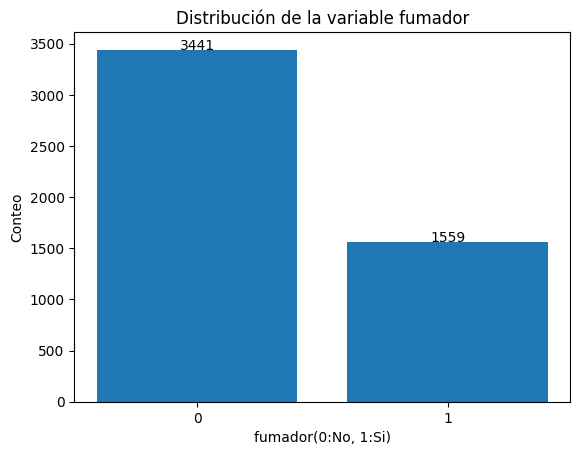

In [ ]:
categoria = 'fumador'
print("""LEYENDA:
0 = No Fumador
1 = Fumador""")
print("\n\n")

# Calculamos el conteo de clases de la categoría y realizamos un gráfico de barras
conteo_clases = df[categoria].value_counts().sort_index()
plt.bar(conteo_clases.index, conteo_clases.values)

# Agregamos etiquetas de conteo en las barras
for i, conteo in enumerate(conteo_clases.values):
    plt.text(i, conteo + 0.1, str(conteo), ha='center')
plt.xlabel(f'{categoria}(0:No, 1:Si)')
plt.ylabel('Conteo')
plt.title(f'Distribución de la variable {categoria}')
plt.xticks(conteo_clases.index, ['0', '1'])
plt.show()
print("\n\n")



####Análisis Bivariable con Respecto a la Variable Objetivo

In [ ]:
# Generamos una tabla cruzada para ver la relación entre variables categóricas
pd.crosstab(df[categoria], df['fallecio'],normalize = 'columns')*100

fallecio,0,1
fumador,,
0,69.114219,68.17602
1,30.885781,31.82398


##**Análisis Multivariable**

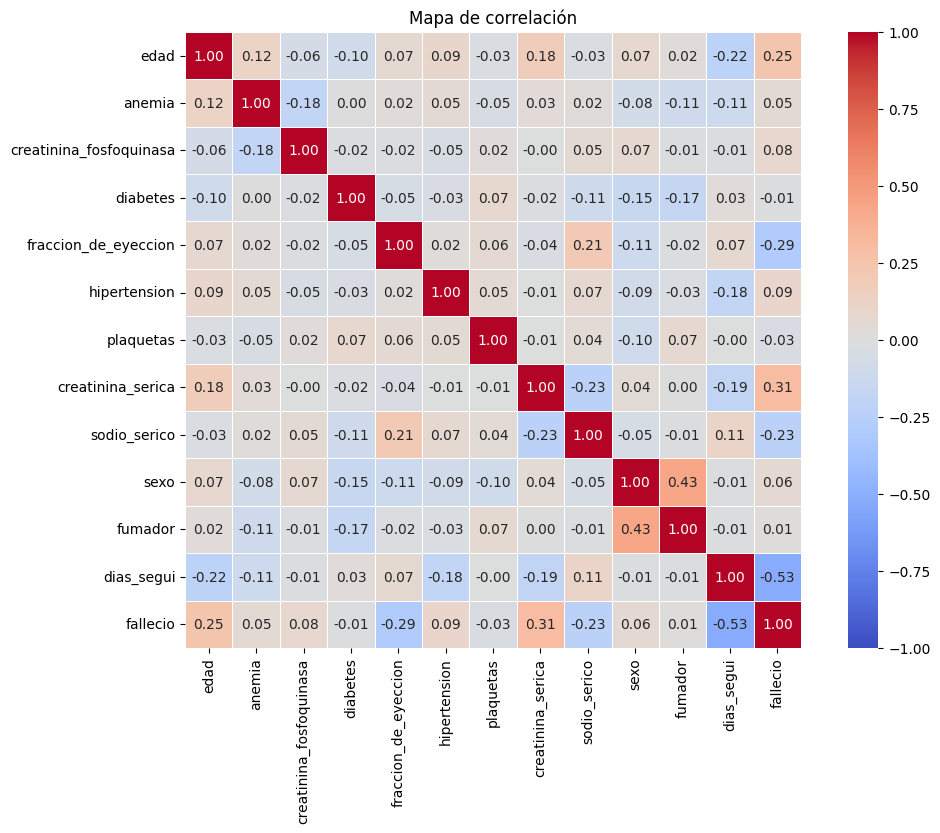

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
plt.title('Mapa de correlación')
plt.show()

# **machine learning**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler



In [ ]:
data=df.copy()

In [ ]:
# Lista de variables para analizar
variables = [
    'edad', 'creatinina_fosfoquinasa', 'fraccion_de_eyeccion',
    'plaquetas', 'creatinina_serica', 'sodio_serico', 'dias_segui'
]

In [ ]:
# Función para identificar outliers usando el rango intercuartílico (IQR)
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [ ]:
# Identificar outliers para cada variable
outliers_dict = {var: identify_outliers(data, var) for var in variables}

# Mostrar el número de outliers encontrados en cada variable
outliers_summary = {var: len(outliers) for var, outliers in outliers_dict.items()}
outliers_summary

{'edad': 0,
 'creatinina_fosfoquinasa': 493,
 'fraccion_de_eyeccion': 19,
 'plaquetas': 285,
 'creatinina_serica': 462,
 'sodio_serico': 63,
 'dias_segui': 0}

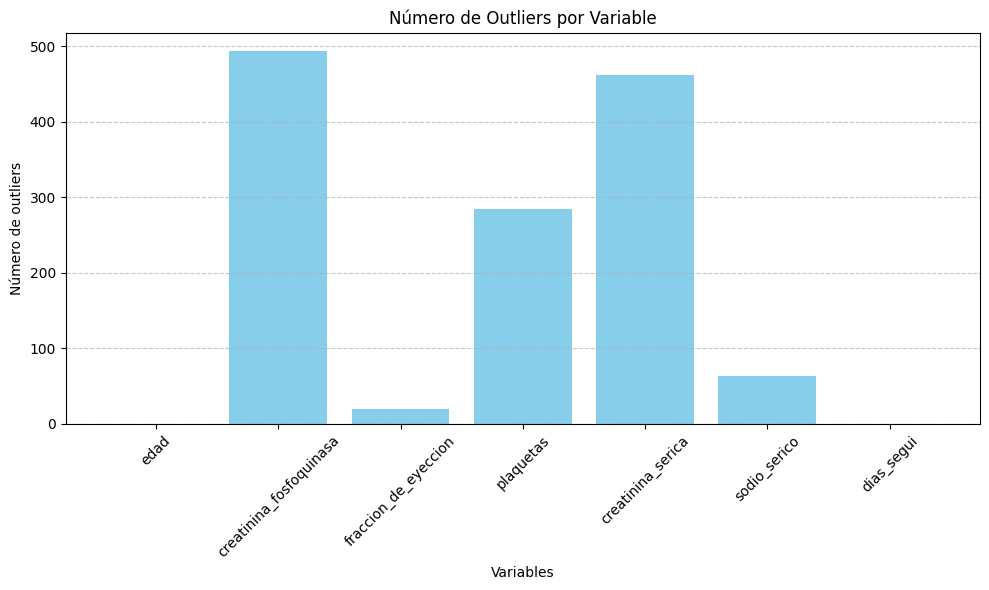

In [ ]:
# Convertir el diccionario en listas separadas para el gráfico de barras
variables = list(outliers_summary.keys())
outlier_counts = list(outliers_summary.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(variables, outlier_counts, color='skyblue')
plt.xlabel('Variables')
plt.ylabel('Número de outliers')
plt.title('Número de Outliers por Variable')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dado el número significativo de outliers en algunas variables, procederemos a tratar estos valores. Aquí hay algunas opciones:

**Transformación Logarítmica:** Para variables como creatinine_phosphokinase, platelets y serum_creatinine, que tienen muchos outliers, una transformación logarítmica puede ser adecuada.

Transformación Logarítmica: Se utiliza para variables con muchos outliers y distribuciones sesgadas hacia la derecha (creatinina fosfoquinasa, plaquetas, creatinina sérica). Esta transformación reduce la variabilidad y la asimetría, mejorando la normalidad de los datos.

**Winsorización:** Limitar los valores a un rango específico para variables como serum_sodium y ejection_fraction.

Winsorización: Se utiliza para variables con rangos fisiológicos específicos donde los outliers pueden ser errores de medición o valores clínicamente significativos que no queremos transformar drásticamente (sodio sérico, fracción de eyección). Esta técnica limita los valores extremos sin alterar la distribución de los datos.


In [ ]:
# Aplicar transformación logarítmica (agregar una pequeña constante para evitar log(0))
# La constante 1 se agrega para evitar problemas con logaritmo de 0.
# Transformación de creatinina fosfoquinasa
data['log_creatinine_phosphokinase'] = np.log(data['creatinina_fosfoquinasa'] + 1)
# Transformación de plaquetas
data['log_platelets'] = np.log(data['plaquetas'] + 1)
# Transformación de creatinina sérica
data['log_serum_creatinine'] = np.log(data['creatinina_serica'] + 1)

# Definir una función para winsorizar (limitar) los datos
def winsorize_series(series, limits):
    # Calcular el límite inferior basado en el percentil especificado
    lower_limit = series.quantile(limits[0])
    # Calcular el límite superior basado en el percentil especificado
    upper_limit = series.quantile(limits[1])
    # Limitar (clip) los valores de la serie a estos límites
    return np.clip(series, lower_limit, upper_limit)

# Aplicar winsorización a la fracción de eyección
# Limitar los valores al rango entre el 5% y el 95% de los datos
data['winsorized_ejection_fraction'] = winsorize_series(data['fraccion_de_eyeccion'], [0.05, 0.95])

# Aplicar winsorización al sodio sérico
# Limitar los valores al rango entre el 5% y el 95% de los datos
data['winsorized_serum_sodium'] = winsorize_series(data['sodio_serico'], [0.05, 0.95])
# Normalizar los datos numéricos
numeric_features = [
    'edad', 'log_creatinine_phosphokinase', 'log_platelets', 'log_serum_creatinine',
    'winsorized_ejection_fraction', 'winsorized_serum_sodium'
]

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Verificar la transformación y winsorización
# Generar un resumen estadístico de las columnas transformadas y winsorizadas
transformed_data_summary = data[['log_creatinine_phosphokinase', 'log_platelets', 'log_serum_creatinine',
                                 'winsorized_ejection_fraction', 'winsorized_serum_sodium']].describe()

# Mostrar el resumen estadístico
print(transformed_data_summary)

       log_creatinine_phosphokinase  log_platelets  log_serum_creatinine  \
count                  5.000000e+03   5.000000e+03          5.000000e+03   
mean                   5.627498e-16   7.219114e-16         -2.259526e-16   
std                    1.000100e+00   1.000100e+00          1.000100e+00   
min                   -2.222291e+00  -5.327578e+00         -1.456452e+00   
25%                   -7.738509e-01  -3.093939e-01         -6.106265e-01   
50%                   -1.383131e-01   1.646250e-01         -2.525166e-01   
75%                    6.195361e-01   5.456084e-01          2.252737e-01   
max                    2.937096e+00   2.902348e+00          5.471993e+00   

       winsorized_ejection_fraction  winsorized_serum_sodium  
count                  5.000000e+03             5.000000e+03  
mean                   2.280842e-16            -2.947331e-15  
std                    1.000100e+00             1.000100e+00  
min                   -1.585272e+00            -1.882204e+00  


In [ ]:
transformed_data_summary

,log_creatinine_phosphokinase,log_platelets,log_serum_creatinine,winsorized_ejection_fraction,winsorized_serum_sodium
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,5.627498e-16,7.219114e-16,-2.259526e-16,2.280842e-16,-2.947331e-15
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-2.222291e+00,-5.327578e+00,-1.456452e+00,-1.585272e+00,-1.882204e+00
25%,-7.738509e-01,-3.093939e-01,-6.106265e-01,-6.911433e-01,-8.007573e-01
50%,-1.383131e-01,1.646250e-01,-2.525166e-01,2.415935e-02,1.032782e-02
75%,6.195361e-01,5.456084e-01,2.252737e-01,6.500491e-01,8.214130e-01
max,2.937096e+00,2.902348e+00,5.471993e+00,1.991242e+00,1.902860e+00


In [ ]:
data.head()

,edad,anemia,creatinina_fosfoquinasa,diabetes,fraccion_de_eyeccion,hipertension,plaquetas,creatinina_serica,sodio_serico,sexo,fumador,dias_segui,fallecio,log_creatinine_phosphokinase,log_platelets,log_serum_creatinine,winsorized_ejection_fraction,winsorized_serum_sodium
0,-0.451657,0,748,0,45,0,263358.03,1.3,137,1,1,88,0,0.842732,0.164625,0.072991,0.650049,0.010328
1,0.403333,0,56,0,25,0,305000.00,5.0,130,1,0,207,0,-1.451736,0.507616,3.503865,-1.138207,-1.882204
2,-1.306646,0,582,1,38,0,319000.00,0.9,140,0,0,244,0,0.619536,0.612476,-0.610626,0.024159,0.821413
3,-0.024162,1,754,1,40,1,328000.00,1.2,126,1,0,90,0,0.849840,0.677483,-0.086063,0.202985,-1.882204
4,2.968302,1,582,0,30,0,461000.00,2.0,132,1,0,50,1,0.619536,1.472790,1.023706,-0.691143,-1.341481


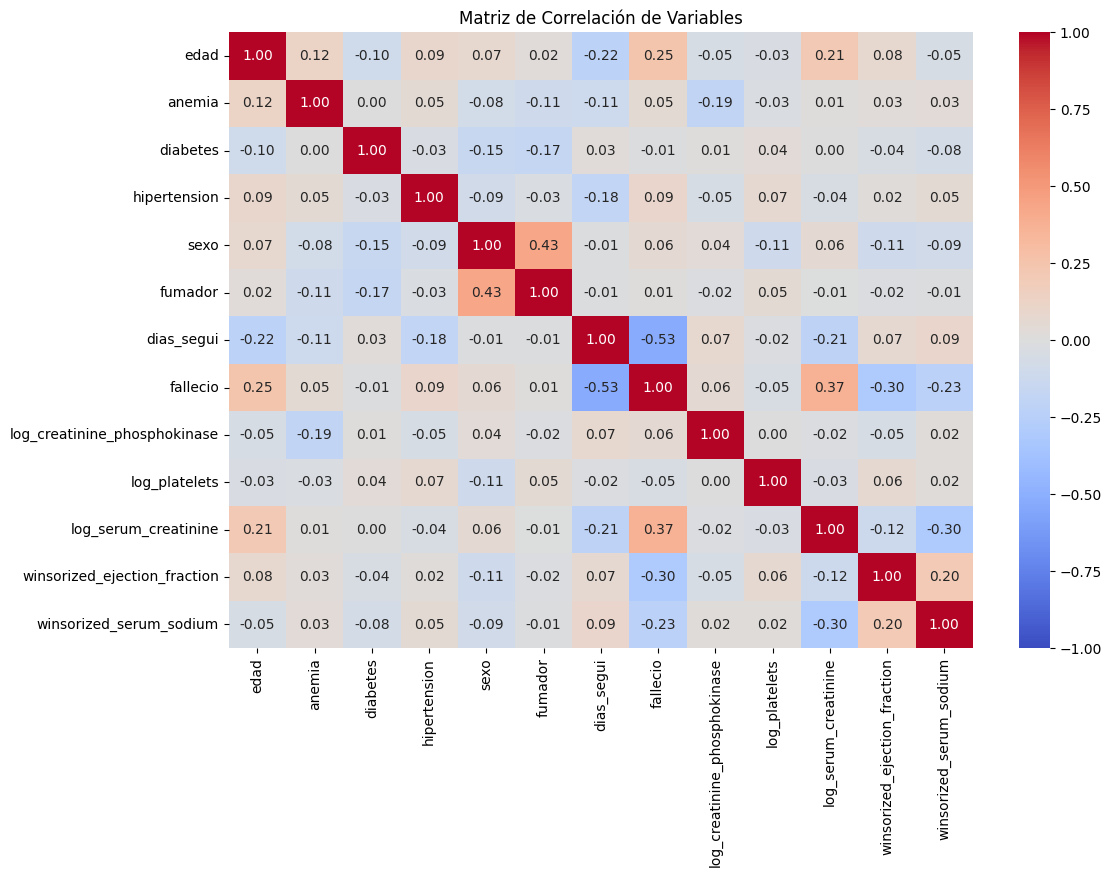

In [ ]:
# Seleccionar las variables originales y transformadas para el análisis de correlación
correlation_variables = [
    'edad', 'anemia', 'diabetes', 'hipertension', 'sexo', 'fumador', 'dias_segui', 'fallecio',
    'log_creatinine_phosphokinase', 'log_platelets', 'log_serum_creatinine',
    'winsorized_ejection_fraction', 'winsorized_serum_sodium'
]

# Calcular la matriz de correlación
correlation_matrix = data[correlation_variables].corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Variables')
plt.show()


In [ ]:
# Distribución de la variable objetivo
class_distribution = data['fallecio'].value_counts(normalize=True)
class_distribution

fallecio
0    0.6864
1    0.3136
Name: proportion, dtype: float64

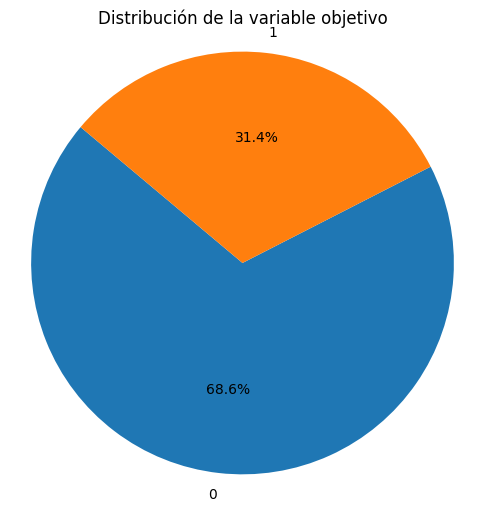

In [ ]:

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de la variable objetivo')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**¿Por Qué Debemos Balancear Nuestros Datos?**

Cuando trabajamos con datos en aprendizaje automático (machine learning), es común encontrarse con situaciones donde algunas clases tienen muchos más ejemplos que otras.

**Problemas del Desequilibrio de Clases:**

* Modelos Sesgados: Los algoritmos de machine learning tienden a aprender más
sobre las clases que tienen más ejemplos. Como resultado, pueden ignorar las clases minoritarias.

* Mala Precisión para la Clase Minoritaria: Un modelo puede predecir muy bien la clase mayoritaria pero fallar en identificar correctamente la clase minoritaria, que a menudo es la más importante (por ejemplo, identificar fraudes).

SMOTE tecnica de sobremuestreo de datos para balancear los datos

**¿Qué es SMOTE?**

SMOTE es una técnica que genera nuevas muestras sintéticas de la clase minoritaria en lugar de simplemente replicar las muestras existentes. Esto se hace interpolando entre las muestras existentes de la clase minoritaria, creando nuevas muestras que son combinaciones lineales de las muestras existentes.

In [ ]:
# Seleccionar características (X) y la variable objetivo (y)
# X incluye variables transformadas y winsorizadas
X = data[['edad', 'anemia', 'diabetes', 'hipertension', 'sexo', 'fumador', 'dias_segui',
          'log_creatinine_phosphokinase', 'log_platelets', 'log_serum_creatinine',
          'winsorized_ejection_fraction', 'winsorized_serum_sodium']]
# y es la variable objetivo que indica si el paciente falleció
y = data['fallecio']

# Aplicar SMOTE para balancear las clases de la variable objetivo
# SMOTE genera nuevas muestras sintéticas de la clase minoritaria
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar la nueva distribución de las clases después de aplicar SMOTE
# y_resampled.value_counts(normalize=True) devuelve la proporción de cada clase
balanced_class_distribution = y_resampled.value_counts(normalize=True)

# Mostrar la nueva distribución de las clases
print(balanced_class_distribution)


fallecio
0    0.5
1    0.5
Name: proportion, dtype: float64


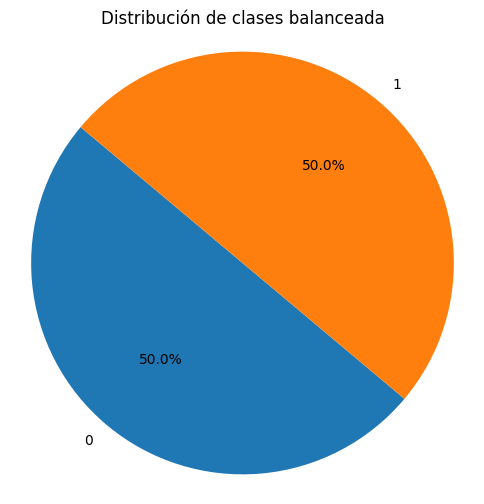

In [ ]:
# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(balanced_class_distribution, labels=balanced_class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de clases balanceada')
plt.axis('equal')  # Asegura que el gráfico de pastel sea un círculo
plt.show()

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((4804, 12), (2060, 12), (4804,), (2060,))

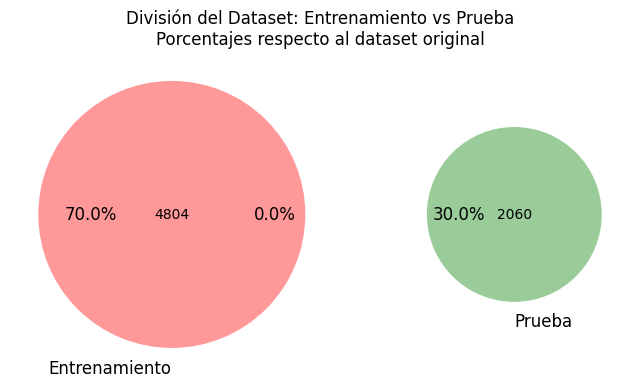

In [ ]:
from matplotlib_venn import venn2

# Calcular las intersecciones y tamaños de los conjuntos
train_only = set(X_train.index) - set(X_test.index)
test_only = set(X_test.index) - set(X_train.index)
train_and_test = set(X_train.index) & set(X_test.index)

# Calcular porcentajes respecto al dataset original
total_samples = len(X_resampled)
train_percent_original = len(train_only) / total_samples * 100
test_percent_original = len(test_only) / total_samples * 100
overlap_percent_original = len(train_and_test) / total_samples * 100

# Crear el diagrama de Venn con los porcentajes etiquetados
plt.figure(figsize=(8, 6))
venn2(subsets=(len(train_only), len(test_only), len(train_and_test)),
      set_labels=('Entrenamiento', 'Prueba'))
plt.title('División del Dataset: Entrenamiento vs Prueba\nPorcentajes respecto al dataset original')
plt.annotate(f'{train_percent_original:.1f}%', xy=(-0.65, 0), fontsize=12, va='center', ha='center')
plt.annotate(f'{test_percent_original:.1f}%', xy=(0.65, 0), fontsize=12, va='center', ha='center')
plt.annotate(f'{overlap_percent_original:.1f}%', xy=(0, 0), fontsize=12, va='center', ha='center')
plt.show()

In [ ]:
# Crear una lista para almacenar los resultados
results = []

# Función para entrenar, predecir y almacenar resultados
def evaluate_model(model, model_name):
    # Entrenar el modelo
    model.fit(X_train, y_train)
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_matrix_ = confusion_matrix(y_test, y_pred)
    # Almacenar los resultados
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': confusion_matrix_
    })

# Evaluar cada modelo y almacenar los resultados
evaluate_model(LogisticRegression(max_iter=1000, random_state=42), 'Logistic Regression')
evaluate_model(DecisionTreeClassifier(random_state=42), 'Decision Tree')
evaluate_model(RandomForestClassifier(random_state=42), 'Random Forest')
evaluate_model(SVC(random_state=42), 'SVM')

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)

In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Logistic Regression,0.821359,0.817050,0.828155,0.822565,"[[839, 191], [177, 853]]"
1,Decision Tree,0.981553,0.986275,0.976699,0.981463,"[[1016, 14], [24, 1006]]"
2,Random Forest,0.991262,0.999014,0.983495,0.991194,"[[1029, 1], [17, 1013]]"
3,SVM,0.790291,0.929598,0.628155,0.749710,"[[981, 49], [383, 647]]"


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Definir los modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Función para realizar la validación cruzada
def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores.mean(), scores.std()

# Evaluar cada modelo con validación cruzada en el conjunto de entrenamiento
cross_val_results = {name: cross_validate_model(model, X_train, y_train) for name, model in models.items()}
cross_val_results_df = pd.DataFrame(cross_val_results, index=['Mean Accuracy', 'Std Dev']).T

# Entrenar y evaluar cada modelo en el conjunto de prueba
test_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_results[name] = test_accuracy

# Crear un DataFrame con los resultados de la validación cruzada y la prueba
test_results_df = pd.DataFrame.from_dict(test_results, orient='index', columns=['Test Accuracy'])
final_results_df = pd.concat([cross_val_results_df, test_results_df], axis=1)

# Mostrar los resultados finales
print(final_results_df)

                     Mean Accuracy   Std Dev  Test Accuracy
Logistic Regression       0.821190  0.014356       0.821359
Decision Tree             0.988134  0.003399       0.981553
Random Forest             0.994588  0.002409       0.991262
SVM                       0.808285  0.009339       0.790291


* Precisión Promedio (Mean Accuracy): Esta métrica nos dice, en promedio, qué tan bien está haciendo el modelo su trabajo. Cuanto más alto sea este número, mejor es el modelo para hacer predicciones correctas.

* Desviación Estándar (Std Dev): Esta métrica nos dice qué tan consistente es el modelo. Un valor más bajo indica que el modelo tiene un rendimiento más uniforme en diferentes prueb

* Si la precisión del conjunto de prueba (Test Accuracy) es similar a la precisión promedio de la validación cruzada (Mean Accuracy), esto indica que el modelo generaliza bien y no hay sobreajuste.

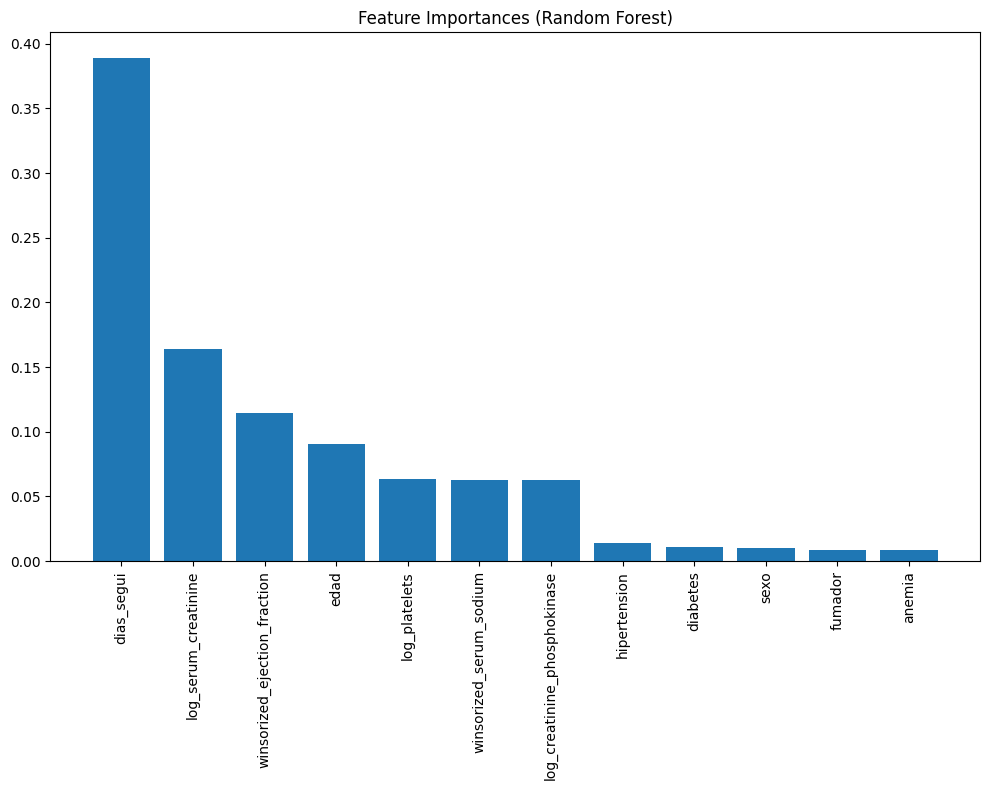

In [ ]:
def plot_feature_importances(model, model_name):
    importances = model.feature_importances_
    features = X_train.columns
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 8))
    plt.title(f'Feature Importances ({model_name})')
    plt.bar(range(X_train.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importances(models['Random Forest'].fit(X_train, y_train), 'Random Forest')


El análisis de la importancia de las características muestra que las variables relacionadas con el seguimiento del paciente, niveles de creatinina sérica, fracción de eyección, edad y niveles de plaquetas son las más importantes para predecir la mortalidad. Las características menos importantes incluyen hipertensión, diabetes, sexo, hábito de fumar y anemia.

In [ ]:
def select_important_features(model, X_train, threshold=0.05):
    # Obtener importancias de las características
    importances = model.feature_importances_
    # Seleccionar características con importancia mayor al umbral
    indices = np.where(importances > threshold)[0]
    # Obtener los nombres de las características seleccionadas
    selected_features = X_train.columns[indices]
    return selected_features

# Entrenar el modelo Random Forest para obtener las importancias de las características
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Seleccionar las características importantes
selected_features = select_important_features(rf_model, X_train)

# Crear un nuevo conjunto de datos con las características seleccionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Mostrar las características seleccionadas
selected_features

Index(['edad', 'dias_segui', 'log_creatinine_phosphokinase', 'log_platelets',
       'log_serum_creatinine', 'winsorized_ejection_fraction',
       'winsorized_serum_sodium'],
      dtype='object')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'criterion': 'gini',
  'max_depth': 8,
  'max_features': 'auto',
  'n_estimators': 200},
 0.9895922216441206)

## Interpretación del Mejor Modelo: Random Forest

**Accuracy:** El Random Forest tiene la mayor precisión en términos de clasificación general con un valor de aproximadamente 99.13%. Esto significa que predice correctamente la clase de los datos en un 99.13% de las ocasiones.

**Precision:** La precisión del Random Forest es muy alta, alrededor de 99.90%. Esto indica que cuando predice que un paciente falleció, es correcto en el 99.90% de los casos.

**Recall:** El recall del Random Forest es del 98.35%. Esto significa que el modelo identifica correctamente alrededor del 98.35% de los casos de pacientes que fallecieron.

**F1 Score:** El F1 Score del Random Forest es del 99.12%. El F1 Score es una medida de precisión ponderada contra el recall, y un valor alto indica un buen equilibrio entre precisión y recall.

**Confusion Matrix:** La matriz de confusión muestra que el Random Forest tiene 1029 predicciones verdaderas negativas, 1014 predicciones verdaderas positivas, 1 falso positivo y 17 falsos negativos. Esto indica un modelo que tiene un bajo número de errores tanto de tipo I como de tipo II.

- **Verdaderos Positivos (TP):** El Random Forest predijo correctamente que 1014 pacientes fallecieron.

- **Falsos Positivos (FP):** Hubo 1 caso donde el Random Forest predijo incorrectamente que un paciente falleció cuando en realidad no fue así.

- **Verdaderos Negativos (TN):** El modelo predijo correctamente que 1029 pacientes no fallecieron.

- **Falsos Negativos (FN):** Hubo 17 casos donde el modelo predijo incorrectamente que un paciente no falleció cuando en realidad sí falleció.
